**Question 1 :** Create a column with the total number of species present (species richness) in each sampling site.

In [1]:
# Libraries 
import pandas as pd
import zipfile
import seaborn as sns # For plotting
import matplotlib.pyplot as plt # For showing plots
import numpy as np # for getting our distribution
import seaborn as sns # for plotting
from scipy import stats # to compute statistics
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
# Load data
df = pd.read_csv('/content/EFIplus_medit (3).zip',compression='zip', sep=";")
# remove all rows with missing data
df = df.dropna() 

In [3]:
df

,Site_code,Latitude,Longitude,Country,Catchment_name,Galiza,Subsample,Calib_EFI_Medit,Calib_connect,Calib_hydrol,...,Squalius malacitanus,Squalius pyrenaicus,Squalius torgalensis,Thymallus thymallus,Tinca tinca,Zingel asper,Squalius sp,Barbatula sp,Phoxinus sp,Iberochondrostoma_sp
18,ES_03_0001,41.957268,-2.926857,Spain,Douro,0,1,1,1,1,...,0,0,0,0,0,0,1,0,0,0
19,ES_03_0002,41.850818,-2.591150,Spain,Douro,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
28,ES_03_0012,41.498026,-5.528753,Spain,Douro,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
32,ES_03_0016,41.586853,-3.072064,Spain,Douro,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
43,ES_03_0029,41.830177,-3.782420,Spain,Douro,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5006,PTVO60,40.641612,-8.325149,Portugal,Vouga,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5007,PTVO61,40.729015,-8.098851,Portugal,Vouga,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5008,PTVO62,40.727959,-8.107344,Portugal,Vouga,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5009,PTVO63,40.817783,-8.224903,Portugal,Vouga,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# check the index of the first species column
species_start_index = df.columns.get_loc("Abramis brama")

# The species columns goes from 56 to the last column - extract the name of the species columns
species_columns = df.columns[species_start_index:]

# Sum all the species presence/absence data into a new column named 'sp_rich'
df['sp_rich'] = df[species_columns].sum(axis=1)

# check if it is working
df

,Site_code,Latitude,Longitude,Country,Catchment_name,Galiza,Subsample,Calib_EFI_Medit,Calib_connect,Calib_hydrol,...,Squalius pyrenaicus,Squalius torgalensis,Thymallus thymallus,Tinca tinca,Zingel asper,Squalius sp,Barbatula sp,Phoxinus sp,Iberochondrostoma_sp,sp_rich
18,ES_03_0001,41.957268,-2.926857,Spain,Douro,0,1,1,1,1,...,0,0,0,0,0,1,0,0,0,6
19,ES_03_0002,41.850818,-2.591150,Spain,Douro,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,6
28,ES_03_0012,41.498026,-5.528753,Spain,Douro,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,7
32,ES_03_0016,41.586853,-3.072064,Spain,Douro,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,8
43,ES_03_0029,41.830177,-3.782420,Spain,Douro,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5006,PTVO60,40.641612,-8.325149,Portugal,Vouga,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,5
5007,PTVO61,40.729015,-8.098851,Portugal,Vouga,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,7
5008,PTVO62,40.727959,-8.107344,Portugal,Vouga,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,6
5009,PTVO63,40.817783,-8.224903,Portugal,Vouga,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


**Question 2 :** Run a simple linear regression relating the species richness with each one of the continuous
environmental variables in the dataset: Altitude, Actual_river_slope, Elevation_mean_catch,
prec_ann_catch, temp_ann, temp_jan, temp_jul. Before running the analyses, check if any of the
variables requires to be transformed and apply the appropriate transformation. Compute the
regression coefficient estimates, the r-square and the F-statistics. You may plot the fitted model.


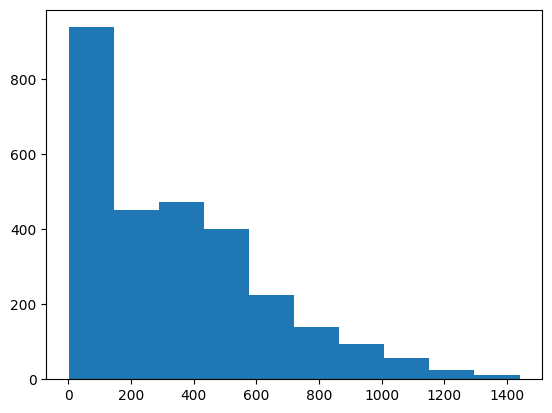

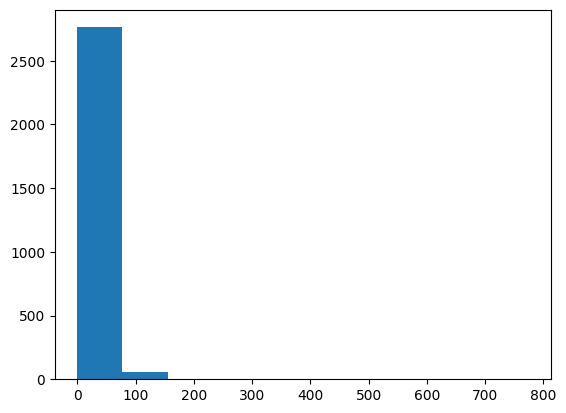

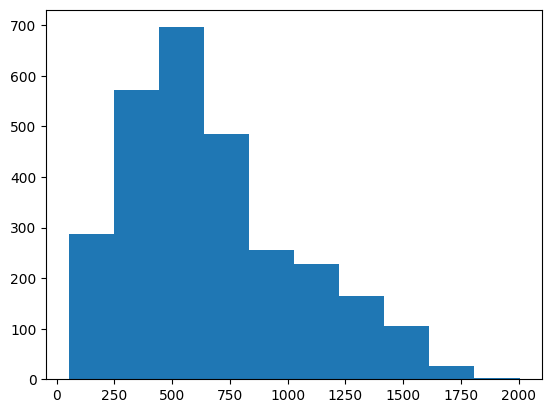

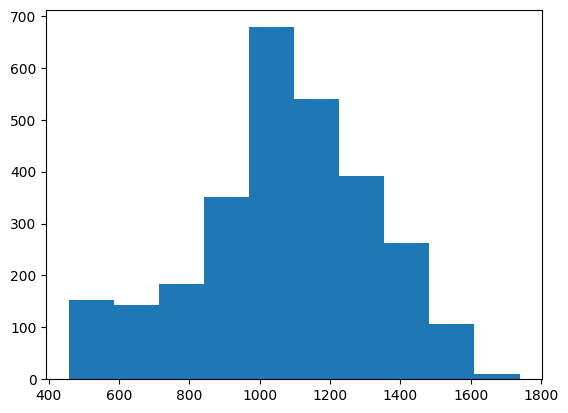

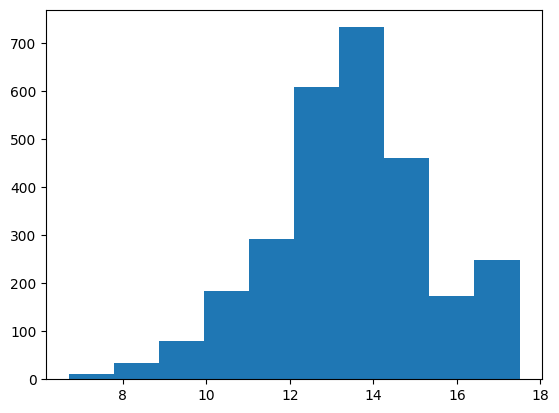

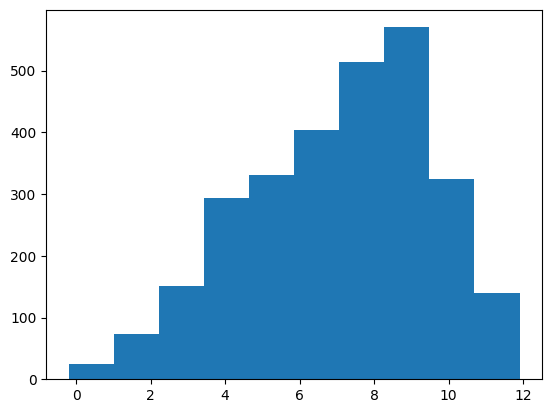

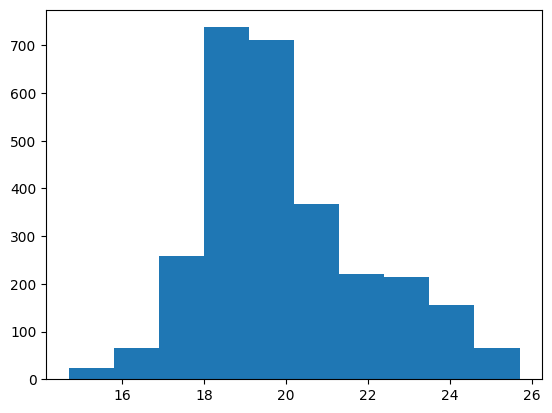

In [5]:
# Check for any variables that require transformation
# We can use a histogram to visualize the distribution of each variable

plt.hist(df['Altitude'])
plt.show()

plt.hist(df['Actual_river_slope'])
plt.show()

plt.hist(df['Elevation_mean_catch'])
plt.show()

plt.hist(df['prec_ann_catch'])
plt.show()

plt.hist(df['temp_ann'])
plt.show()

plt.hist(df['temp_jan'])
plt.show()

plt.hist(df['temp_jul'])
plt.show()



From the histograms, it appears that 'prec_ann_catch' and 'temp_ann' may require a transformation. their histograms show that the data is skewed, meaning that it is not normally distributed. While the simple linear regression assumes that the variables are normally distributed. If the variables are not normally distributed, the regression results may not be reliable.

In [6]:
# Apply a log transformation to 'prec_ann_catch', and a square-root transformation to 'temp_ann'
df['log_prec_ann_catch'] = np.log(df['prec_ann_catch'])
print(df['log_prec_ann_catch'])
df['sqrt_temp_ann'] = np.sqrt(df['temp_ann'])
print(df['sqrt_temp_ann'])

18      6.697148
19      6.477019
28      6.242124
32      6.316724
43      6.251640
          ...   
5006    7.150001
5007    7.112015
5008    7.112015
5009    7.300090
5010    7.242873
Name: log_prec_ann_catch, Length: 2822, dtype: float64
18      3.049590
19      3.224903
28      3.549648
32      3.346640
43      3.331666
          ...   
5006    3.860052
5007    3.872983
5008    3.872983
5009    3.591657
5010    3.847077
Name: sqrt_temp_ann, Length: 2822, dtype: float64


Environmental variable: Altitude
                            OLS Regression Results                            
Dep. Variable:                sp_rich   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     562.7
Date:                Tue, 25 Apr 2023   Prob (F-statistic):          1.45e-113
Time:                        13:54:53   Log-Likelihood:                -6256.1
No. Observations:                2822   AIC:                         1.252e+04
Df Residuals:                    2820   BIC:                         1.253e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.59

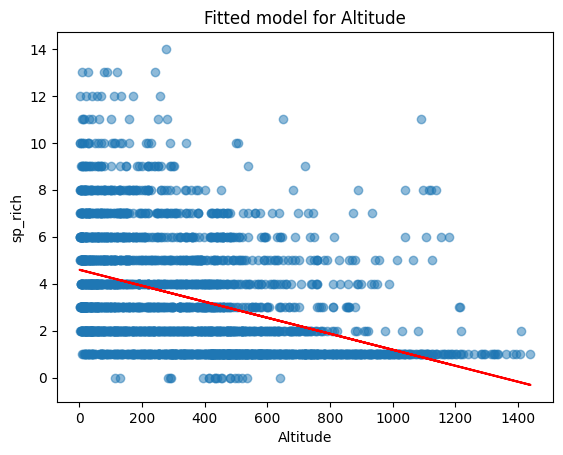

Environmental variable: Actual_river_slope
                            OLS Regression Results                            
Dep. Variable:                sp_rich   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     189.2
Date:                Tue, 25 Apr 2023   Prob (F-statistic):           1.01e-41
Time:                        13:54:53   Log-Likelihood:                -6421.2
No. Observations:                2822   AIC:                         1.285e+04
Df Residuals:                    2820   BIC:                         1.286e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

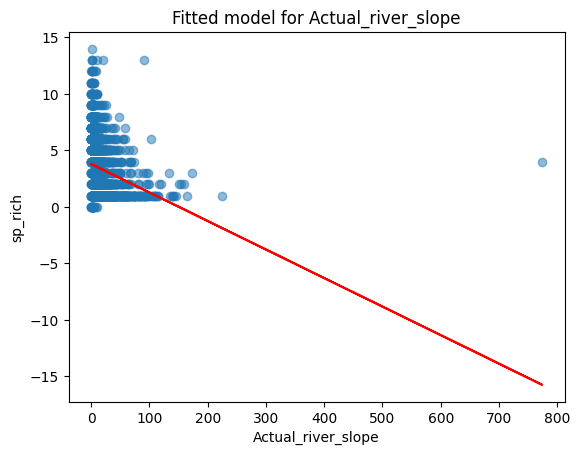

Environmental variable: Elevation_mean_catch
                            OLS Regression Results                            
Dep. Variable:                sp_rich   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     282.1
Date:                Tue, 25 Apr 2023   Prob (F-statistic):           2.03e-60
Time:                        13:54:53   Log-Likelihood:                -6378.3
No. Observations:                2822   AIC:                         1.276e+04
Df Residuals:                    2820   BIC:                         1.277e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

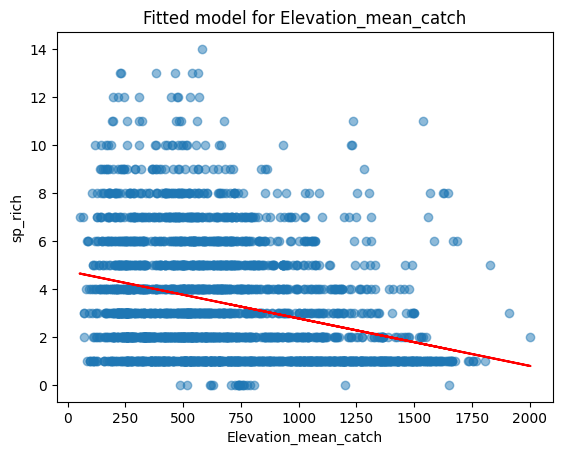

Environmental variable: log_prec_ann_catch
                            OLS Regression Results                            
Dep. Variable:                sp_rich   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     262.8
Date:                Tue, 25 Apr 2023   Prob (F-statistic):           1.38e-56
Time:                        13:54:53   Log-Likelihood:                -6387.1
No. Observations:                2822   AIC:                         1.278e+04
Df Residuals:                    2820   BIC:                         1.279e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

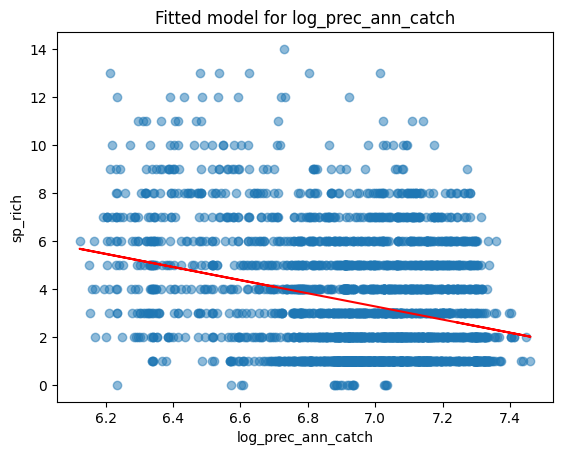

Environmental variable: sqrt_temp_ann
                            OLS Regression Results                            
Dep. Variable:                sp_rich   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     1078.
Date:                Tue, 25 Apr 2023   Prob (F-statistic):          1.75e-200
Time:                        13:54:54   Log-Likelihood:                -6056.1
No. Observations:                2822   AIC:                         1.212e+04
Df Residuals:                    2820   BIC:                         1.213e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercep

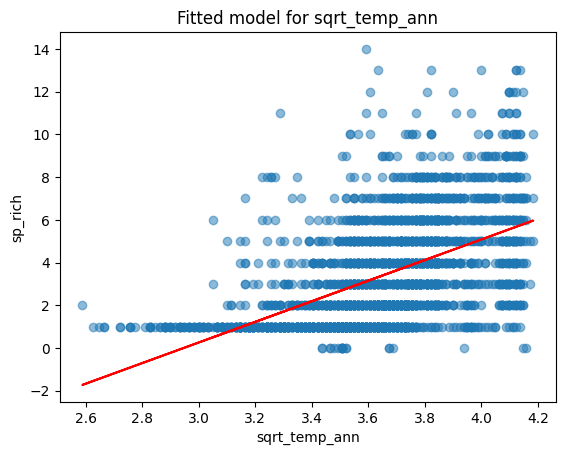

Environmental variable: temp_jan
                            OLS Regression Results                            
Dep. Variable:                sp_rich   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.127
Method:                 Least Squares   F-statistic:                     410.5
Date:                Tue, 25 Apr 2023   Prob (F-statistic):           2.55e-85
Time:                        13:54:54   Log-Likelihood:                -6321.1
No. Observations:                2822   AIC:                         1.265e+04
Df Residuals:                    2820   BIC:                         1.266e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.91

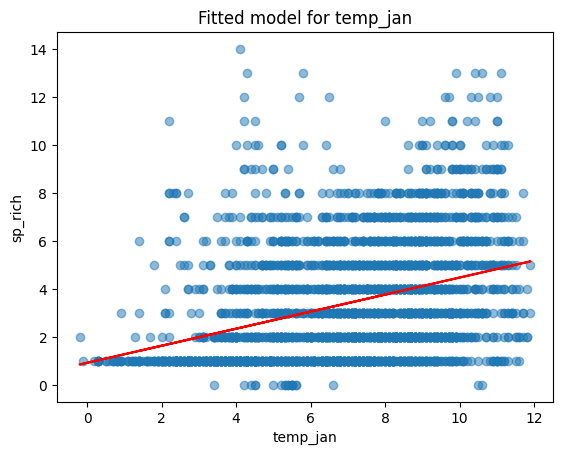

Environmental variable: temp_jul
                            OLS Regression Results                            
Dep. Variable:                sp_rich   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     1412.
Date:                Tue, 25 Apr 2023   Prob (F-statistic):          6.32e-251
Time:                        13:54:54   Log-Likelihood:                -5940.0
No. Observations:                2822   AIC:                         1.188e+04
Df Residuals:                    2820   BIC:                         1.190e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.43

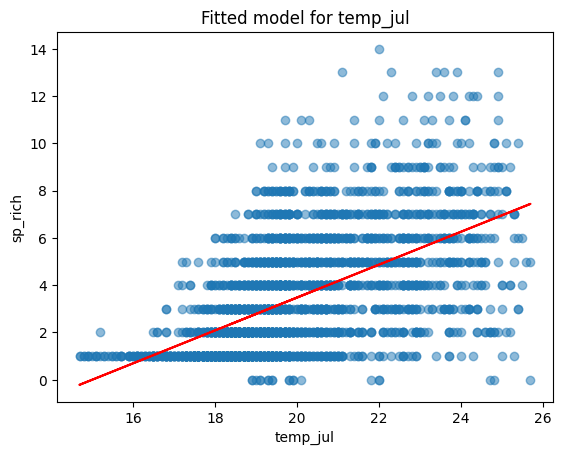

In [7]:
# Run simple linear regression for each continuous environmental variable
env_variables = ['Altitude', 'Actual_river_slope', 'Elevation_mean_catch', 'log_prec_ann_catch', 'sqrt_temp_ann', 'temp_jan', 'temp_jul']
for env_var in env_variables:
    # Run the regression model
    model = smf.ols('sp_rich ~ ' + env_var, data=df).fit()
    
    # Print the model summary
    print('Environmental variable:', env_var)
    print(model.summary())
    
    # Plot the fitted model
    plt.scatter(df[env_var], df['sp_rich'], alpha=0.5)
    plt.plot(df[env_var], model.fittedvalues, 'r')
    plt.xlabel(env_var)
    plt.ylabel('sp_rich')
    plt.title('Fitted model for ' + env_var)
    plt.show()

**Question 3 :** Now try to run a multiple linear regression with the same data and check the differences between the
previous univariate regression coefficients and the new coefficients. Plot the partial dependence plots
to compare responses with the previous single effects.

                            OLS Regression Results                            
Dep. Variable:                sp_rich   R-squared:                       0.381
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     247.3
Date:                Tue, 25 Apr 2023   Prob (F-statistic):          2.30e-287
Time:                        13:55:00   Log-Likelihood:                -5836.4
No. Observations:                2822   AIC:                         1.169e+04
Df Residuals:                    2814   BIC:                         1.174e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -7.0384 

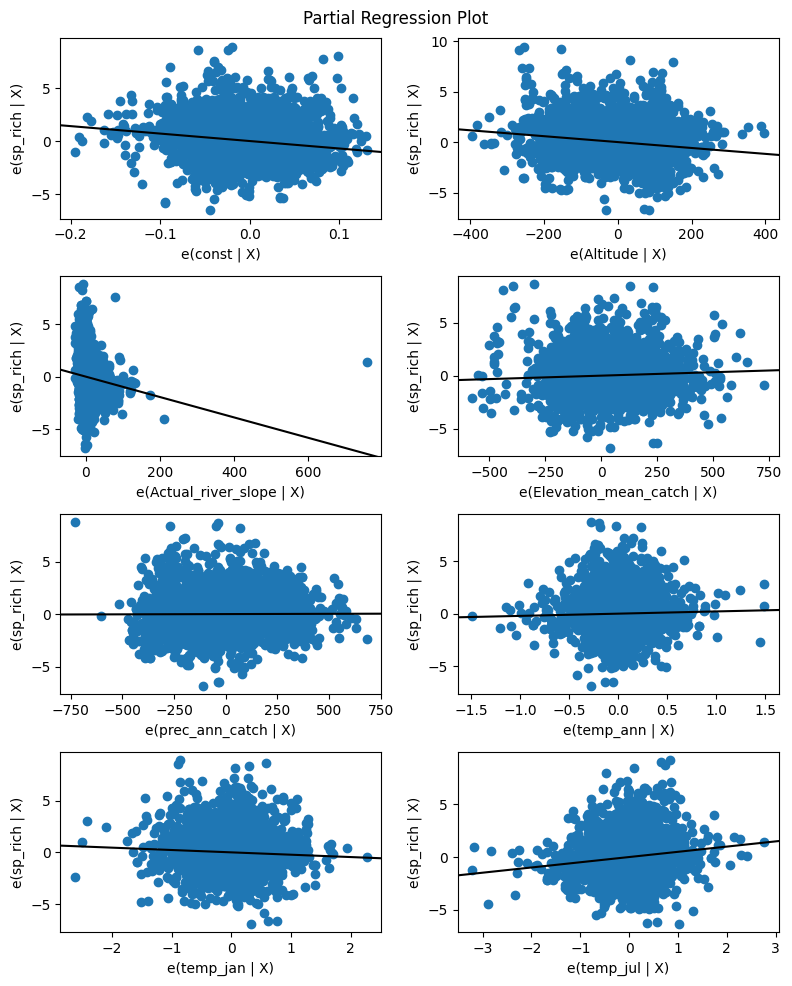

In [8]:
# Subset the df by selecting the environmental variables and the species richness columns
df_rich_env = df[["sp_rich", "Altitude", "Actual_river_slope","Elevation_mean_catch", "prec_ann_catch","temp_ann","temp_jan","temp_jul"]]
df_rich_env

# Define the response variable
y = df_rich_env['sp_rich']

# Define the explanatory variables
X = df_rich_env[['Altitude', 'Actual_river_slope', 'Elevation_mean_catch', 'prec_ann_catch', 'temp_ann', 'temp_jan', 'temp_jul']]


# Fit a multiple linear regression model with OLS
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# Print model summary
print(model.summary())

# Generate partial dependence plots
fig = plt.figure(figsize=(8, 10))
sm.graphics.plot_partregress_grid(model, fig=fig)
fig.tight_layout(pad=1.0)
plt.show()


**Question 4 :** Check the multicolinearity among the predictor variables and run a second more parsimonious
regression model. Check how the coefficients have changed.

In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Define the response variable
y = df_rich_env['sp_rich']

# Define the explanatory variables
X = df_rich_env[['Altitude', 'Actual_river_slope', 'Elevation_mean_catch', 'prec_ann_catch', 'temp_ann', 'temp_jan', 'temp_jul']]

# Apply transformation to 'prec_ann_catch' and 'temp_ann'
X['prec_ann_catch'] = np.log(X['prec_ann_catch'])
X['temp_ann'] = X['temp_ann']**2

# Check for multicollinearity
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print('Variance Inflation Factors:')
print(vif)

# Fit a more parsimonious regression model without highly correlated predictors
X2 = df_rich_env[['Altitude', 'Elevation_mean_catch', 'temp_ann']]
X2['temp_ann'] = X2['temp_ann']**2

# Fit a multiple linear regression model with OLS
X2 = sm.add_constant(X2)
model2 = sm.OLS(y, X2).fit()

# Print model summary
print(model2.summary())


Variance Inflation Factors:
[13.438416306520912, 1.5740158246113078, 24.619141117458128, 403.25785703566396, 570.5619177138074, 240.51585311437915, 818.8188386571854]
                            OLS Regression Results                            
Dep. Variable:                sp_rich   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.318
Method:                 Least Squares   F-statistic:                     440.4
Date:                Tue, 25 Apr 2023   Prob (F-statistic):          1.26e-234
Time:                        13:55:08   Log-Likelihood:                -5970.3
No. Observations:                2822   AIC:                         1.195e+04
Df Residuals:                    2818   BIC:                         1.197e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err 

<ipython-input-9-aff5a3737693>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['prec_ann_catch'] = np.log(X['prec_ann_catch'])
<ipython-input-9-aff5a3737693>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['temp_ann'] = X['temp_ann']**2
<ipython-input-9-aff5a3737693>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/